<a href="https://colab.research.google.com/github/Pratham08dixit/Traffic-Flow-Prediction/blob/main/Traffic_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
df = pd.read_csv('TrafficDataset.csv')
df.head(5)

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10-10-2023,Tuesday,13,2,2,24,41,normal
1,12:15:00 AM,10-10-2023,Tuesday,14,1,1,36,52,normal
2,12:30:00 AM,10-10-2023,Tuesday,10,2,2,32,46,normal
3,12:45:00 AM,10-10-2023,Tuesday,10,2,2,36,50,normal
4,1:00:00 AM,10-10-2023,Tuesday,11,2,1,34,48,normal


In [3]:
df.shape

(2976, 9)

In [4]:
df.dtypes

,0
Time,object
Date,object
Day of the week,object
CarCount,int64
BikeCount,int64
BusCount,int64
TruckCount,int64
Total,int64
Traffic Situation,object


In [5]:
df['Time'].unique()

array(['12:00:00 AM', '12:15:00 AM', '12:30:00 AM', '12:45:00 AM',
       '1:00:00 AM', '1:15:00 AM', '1:30:00 AM', '1:45:00 AM',
       '2:00:00 AM', '2:15:00 AM', '2:30:00 AM', '2:45:00 AM',
       '3:00:00 AM', '3:15:00 AM', '3:30:00 AM', '3:45:00 AM',
       '4:00:00 AM', '4:15:00 AM', '4:30:00 AM', '4:45:00 AM',
       '5:00:00 AM', '5:15:00 AM', '5:30:00 AM', '5:45:00 AM',
       '6:00:00 AM', '6:15:00 AM', '6:30:00 AM', '6:45:00 AM',
       '7:00:00 AM', '7:15:00 AM', '7:30:00 AM', '7:45:00 AM',
       '8:00:00 AM', '8:15:00 AM', '8:30:00 AM', '8:45:00 AM',
       '9:00:00 AM', '9:15:00 AM', '9:30:00 AM', '9:45:00 AM',
       '10:00:00 AM', '10:15:00 AM', '10:30:00 AM', '10:45:00 AM',
       '11:00:00 AM', '11:15:00 AM', '11:30:00 AM', '11:45:00 AM',
       '12:00:00 PM', '12:15:00 PM', '12:30:00 PM', '12:45:00 PM',
       '1:00:00 PM', '1:15:00 PM', '1:30:00 PM', '1:45:00 PM',
       '2:00:00 PM', '2:15:00 PM', '2:30:00 PM', '2:45:00 PM',
       '3:00:00 PM', '3:15:00 PM', '3:3

In [6]:
# Converting 'Time' to minutes
df['Time'] = pd.to_datetime(df['Time'], format='%I:%M:%S %p').dt.hour * 60 + pd.to_datetime(df['Time'], format='%I:%M:%S %p').dt.minute
df['Time'].unique()

array([   0,   15,   30,   45,   60,   75,   90,  105,  120,  135,  150,
        165,  180,  195,  210,  225,  240,  255,  270,  285,  300,  315,
        330,  345,  360,  375,  390,  405,  420,  435,  450,  465,  480,
        495,  510,  525,  540,  555,  570,  585,  600,  615,  630,  645,
        660,  675,  690,  705,  720,  735,  750,  765,  780,  795,  810,
        825,  840,  855,  870,  885,  900,  915,  930,  945,  960,  975,
        990, 1005, 1020, 1035, 1050, 1065, 1080, 1095, 1110, 1125, 1140,
       1155, 1170, 1185, 1200, 1215, 1230, 1245, 1260, 1275, 1290, 1305,
       1320, 1335, 1350, 1365, 1380, 1395, 1410, 1425], dtype=int32)

In [7]:
df['Date'].unique()

array(['10-10-2023', '11-10-2023', '12-10-2023', '13-10-2023',
       '14-10-2023', '15-10-2023', '16-10-2023', '17-10-2023',
       '18-10-2023', '19-10-2023', '20-10-2023', '21-10-2023',
       '22-10-2023', '23-10-2023', '24-10-2023', '25-10-2023',
       '26-10-2023', '27-10-2023', '28-10-2023', '29-10-2023',
       '30-10-2023', '31-10-2023', '01-11-2023', '02-11-2023',
       '03-11-2023', '04-11-2023', '05-11-2023', '06-11-2023',
       '07-11-2023', '08-11-2023', '09-11-2023'], dtype=object)

In [8]:
# Convert 'Date' to datetime format (dd-mm-yyyy)
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')

# Checking for any missing values or incorrect parsing
print("\nConverted Date Data:")
print(df['Date'].head(10))
print("Missing values in 'Date':", df['Date'].isna().sum())

# Convert to days since a reference date
reference_date = pd.Timestamp('2023-10-09')
df['Date'] = (df['Date'] - reference_date).dt.days

# Checking final data after making changes in date
print("\nFinal Date Data:")
print(df.dtypes)


Converted Date Data:
0   2023-10-10
1   2023-10-10
2   2023-10-10
3   2023-10-10
4   2023-10-10
5   2023-10-10
6   2023-10-10
7   2023-10-10
8   2023-10-10
9   2023-10-10
Name: Date, dtype: datetime64[ns]
Missing values in 'Date': 0

Final Date Data:
Time                  int32
Date                  int64
Day of the week      object
CarCount              int64
BikeCount             int64
BusCount              int64
TruckCount            int64
Total                 int64
Traffic Situation    object
dtype: object


In [9]:
df['Traffic Situation'].unique()

array(['normal', 'low', 'heavy', 'high'], dtype=object)

In [10]:
label_encoder = LabelEncoder()
# Encoding text to numerical data for traffic_situation
df['Traffic Situation'] = label_encoder.fit_transform(df['Traffic Situation'])

**Starting/Performing EDA (Exploratory data analysis) to gain insights from data**

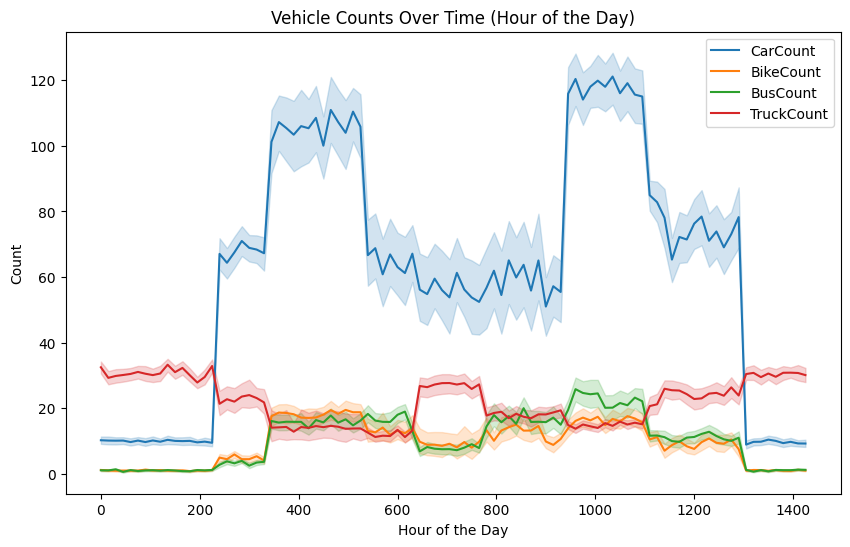

In [11]:
# Vehicle Counts Over Time (Hour of the Day)
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Time', y='CarCount', label='CarCount')
sns.lineplot(data=df, x='Time', y='BikeCount', label='BikeCount')
sns.lineplot(data=df, x='Time', y='BusCount', label='BusCount')
sns.lineplot(data=df, x='Time', y='TruckCount', label='TruckCount')
plt.title('Vehicle Counts Over Time (Hour of the Day)')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.legend()
plt.show()

Insight from the graph - The graph clearly shows vehicle traffic patterns over time. Cars have the highest volume, followed by bikes, buses, and trucks. There are two peak periods: morning and evening.

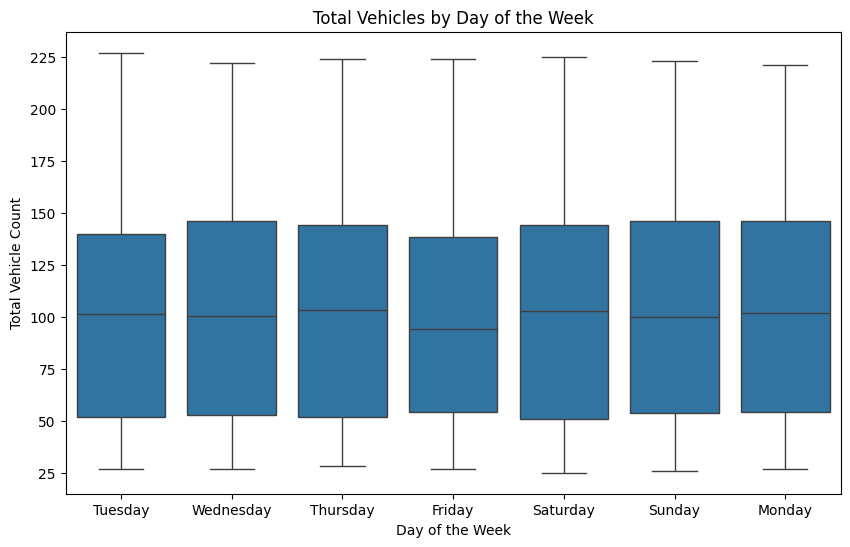

In [12]:
# Total Vehicles by Day of the Week
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Day of the week', y='Total')
plt.title('Total Vehicles by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Vehicle Count')
plt.show()

Insights from the graph - The box plots indicate the median, quartiles, and outliers for each day. There is no significant difference in the overall vehicle count across the days.

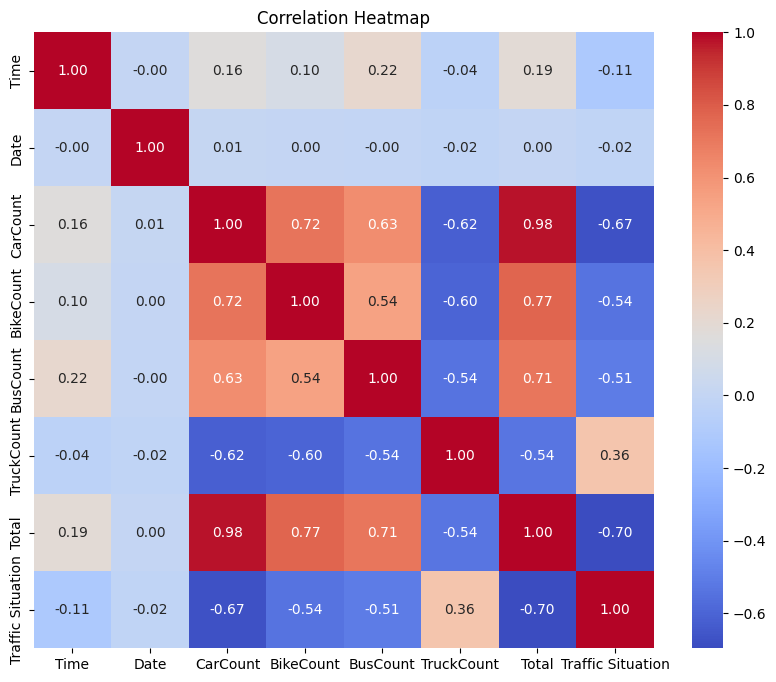

In [13]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
# Removing day of the week column
correlation_matrix = df.drop('Day of the week', axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Insight from the heatmap - CarCount and BikeCount: These variables have a strong positive correlation, indicating that they tend to increase or decrease together. TruckCount and Traffic Situation: These variables have a strong negative correlation, suggesting that increased truck traffic is associated with lower traffic conditions. Time and Traffic Situation: There is a weak negative correlation between time and traffic situation, indicating that traffic tends to be better at certain times of the day.

**Hypothesis from EDA :**


*   Traffic volume varies significantly by the time of day and day of the week.
*   The correlation between different vehicle types may indicate patterns in traffic flow.


*   Predicting traffic situations might be feasible using machine learning models based on vehicle counts.

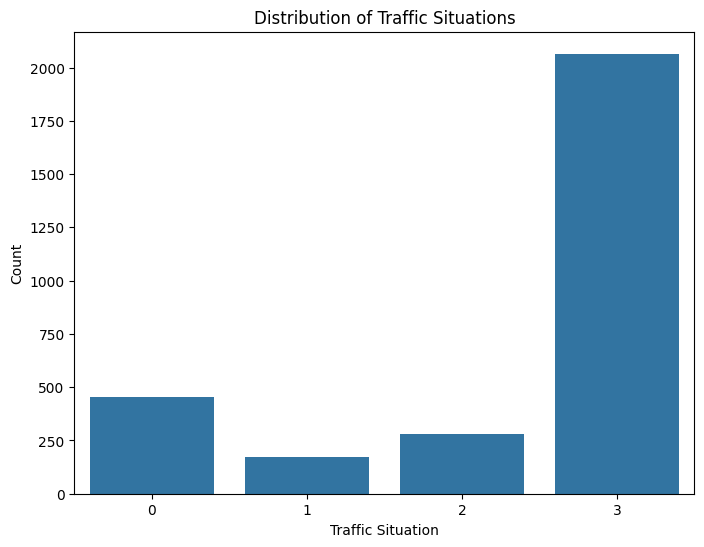

In [14]:
# Traffic Situation Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Traffic Situation', data=df)
plt.title('Distribution of Traffic Situations')
plt.xlabel('Traffic Situation')
plt.ylabel('Count')
plt.show()

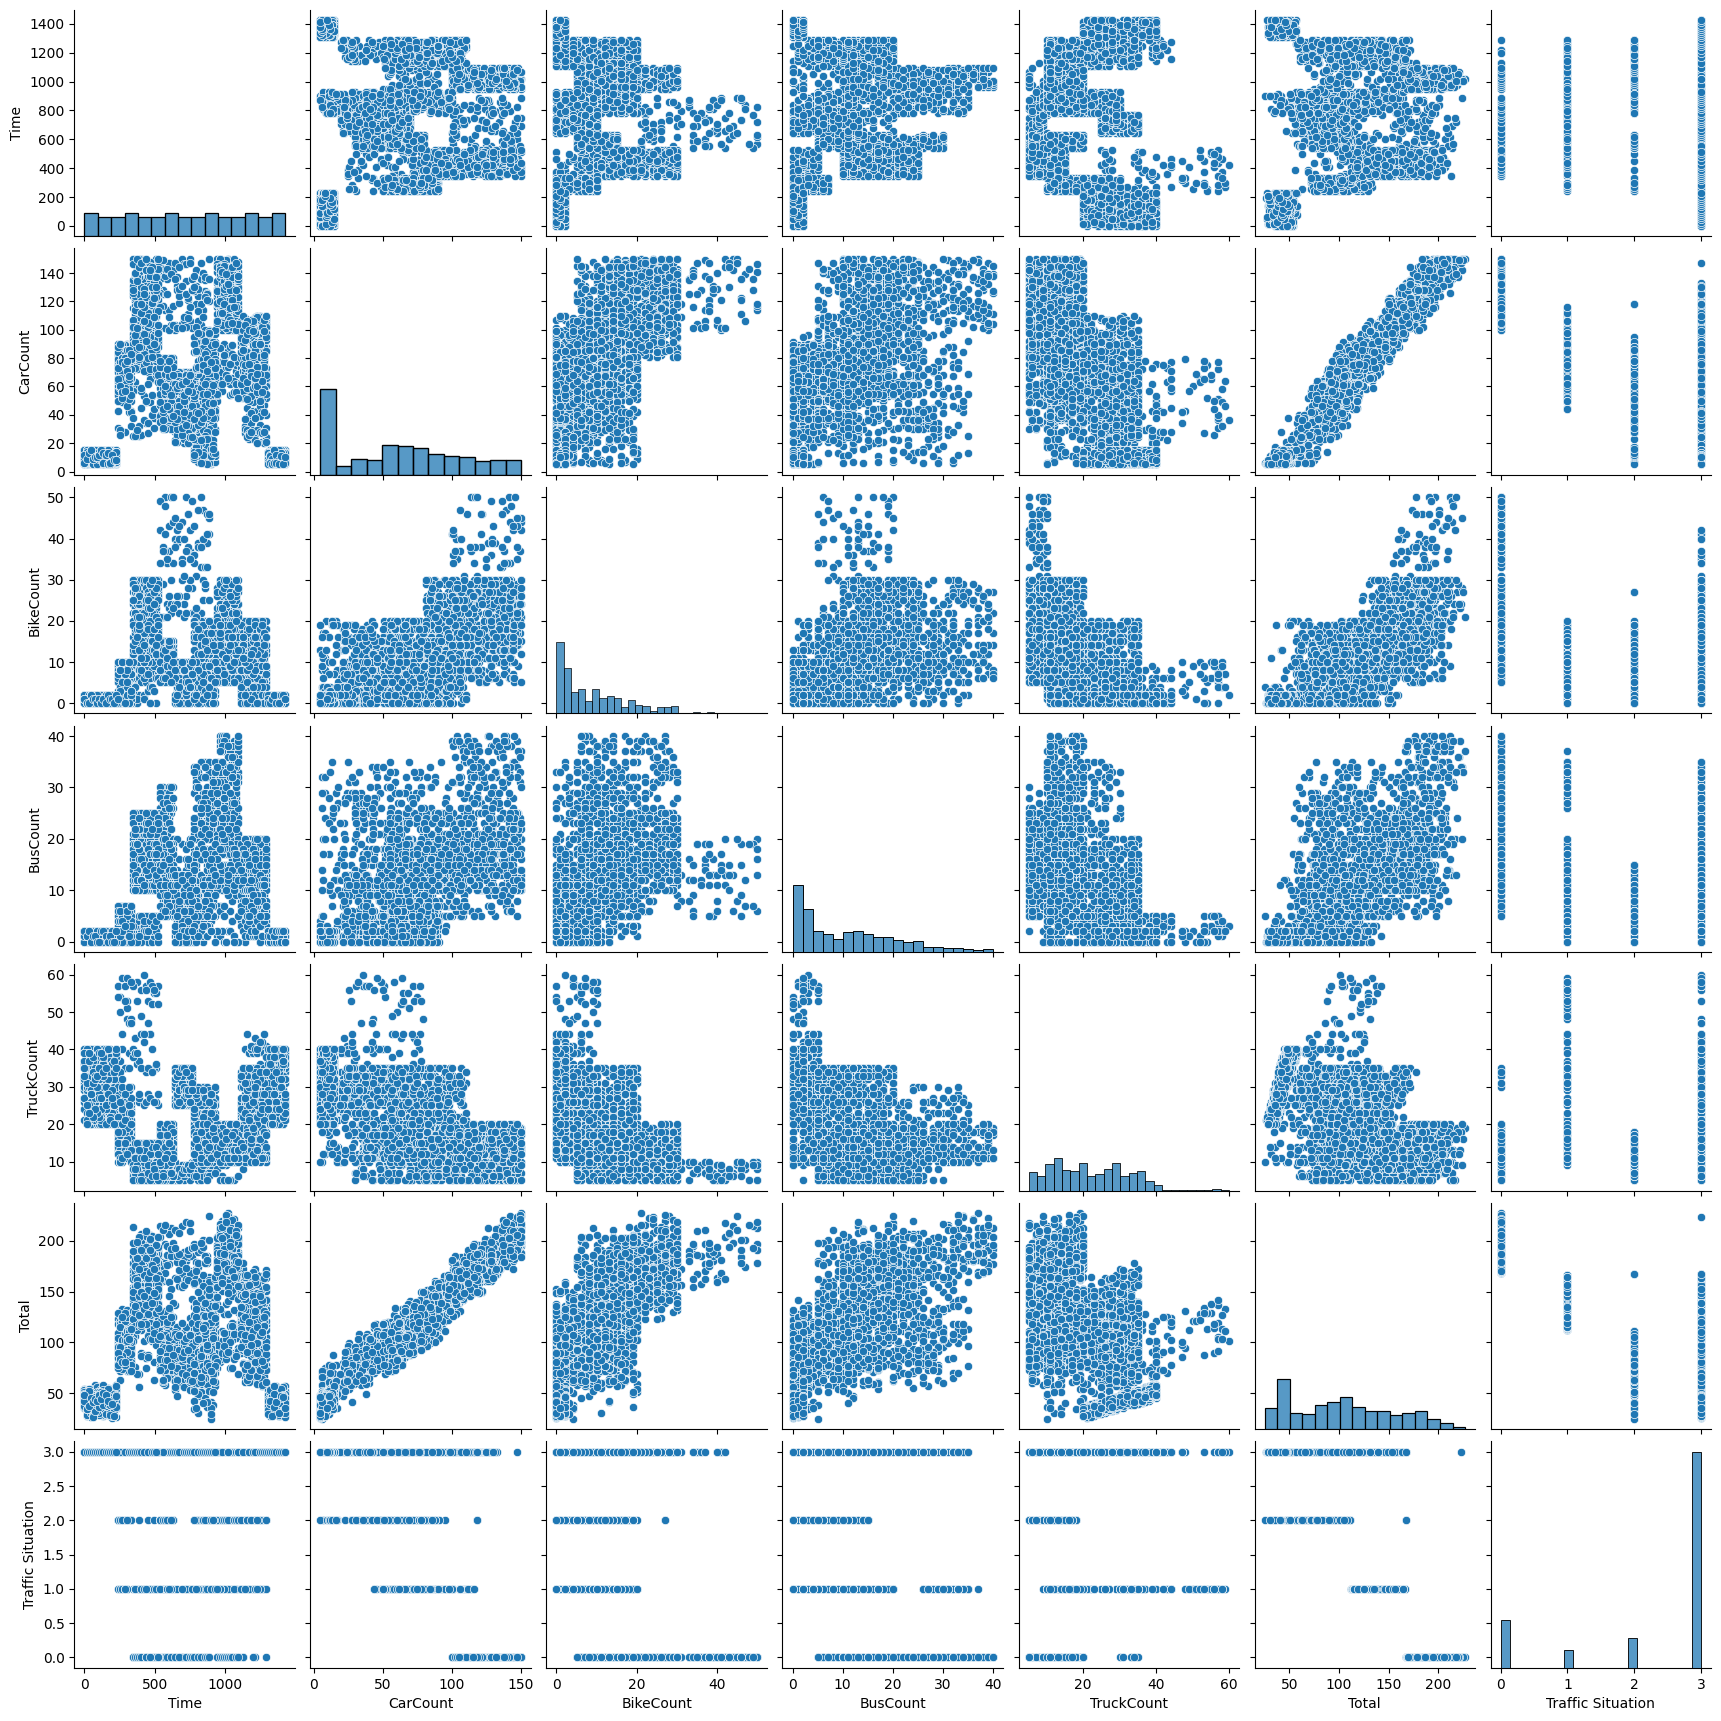

In [15]:

# Pairplot
sns.pairplot(df[['Time', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total', 'Traffic Situation']])
plt.show()

/tmp/ipython-input-3763528279.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Traffic Situation', y='Time', data=df, palette='Set1')


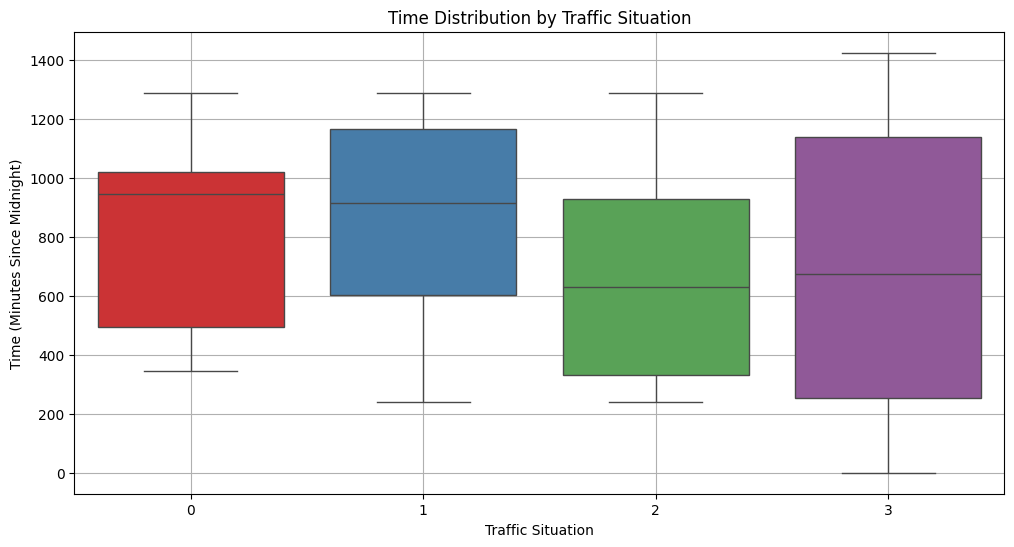

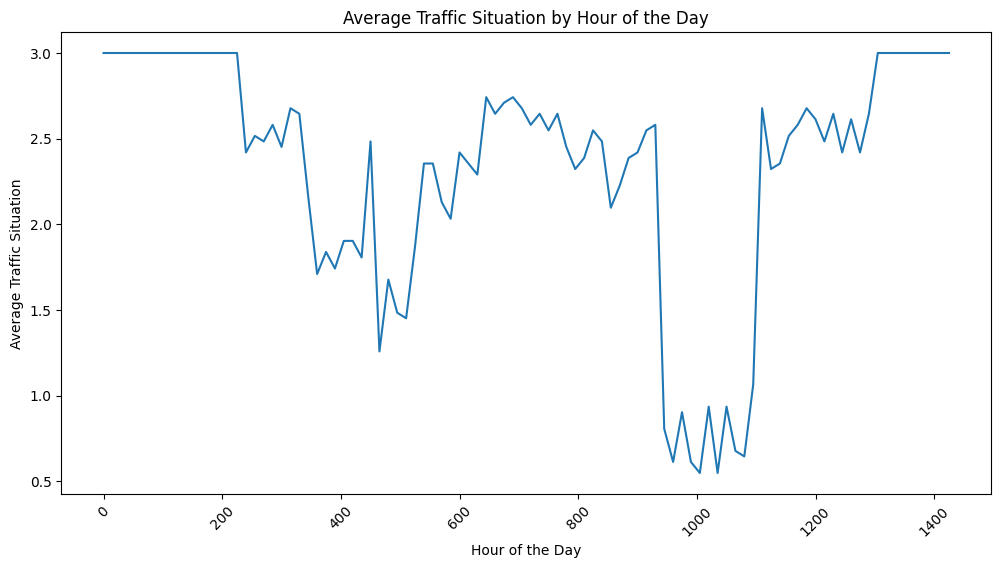

In [16]:
df['Traffic Situation'] = pd.Categorical(df['Traffic Situation']).codes

# Box plot to show distribution
plt.figure(figsize=(12, 6))
sns.boxplot(x='Traffic Situation', y='Time', data=df, palette='Set1')
plt.title('Time Distribution by Traffic Situation')
plt.xlabel('Traffic Situation')
plt.ylabel('Time (Minutes Since Midnight)')
plt.grid(True)
plt.show()

# Line plot to show average traffic situation over the hours
plt.figure(figsize=(12, 6))
avg_traffic_by_time = df.groupby('Time')['Traffic Situation'].mean()
sns.lineplot(x=avg_traffic_by_time.index, y=avg_traffic_by_time.values)
plt.title('Average Traffic Situation by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Traffic Situation')
plt.xticks(rotation=45)
plt.show()

Explanation:

*   Boxplot:
Displays the distribution of Time for each Traffic Situation category. Helps to visualize the range and median of Time values for different traffic situations.
*   Line Plot:
The line plot shows the average traffic situation for each hour of the day, providing a continuous view of traffic trends over time.






**Model Training :**
Training a Random Forest Classifier model to predict traffic situations based on features like time, day of week, and vehicle counts. For evaluation I am using metrics like accuracy, precision, recall, and F1-score.


In [17]:
le = LabelEncoder()
df['Day of the week'] = le.fit_transform(df['Day of the week'])
df['Traffic Situation'] = le.fit_transform(df['Traffic Situation'])

X = df[['Time', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Date']]
y = df['Traffic Situation']

# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[ 80   1   0   5]
 [  1  31   0   7]
 [  1   0  52   0]
 [  7   3   3 405]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91        86
           1       0.89      0.79      0.84        39
           2       0.95      0.98      0.96        53
           3       0.97      0.97      0.97       418

    accuracy                           0.95       596
   macro avg       0.93      0.92      0.92       596
weighted avg       0.95      0.95      0.95       596

Accuracy Score: 0.9530201342281879


**Report Evaluation :**


*   The overall accuracy of the model is 0.95
*   The precision, recall, and F1-score for each class are all relatively high, ranging from 0.89 to 0.99 means the model is able to accurately identify and predict different traffic situations. Class 3 has the highest precision, recall, and F1-score, indicating that the model is particularly good at predicting this class.




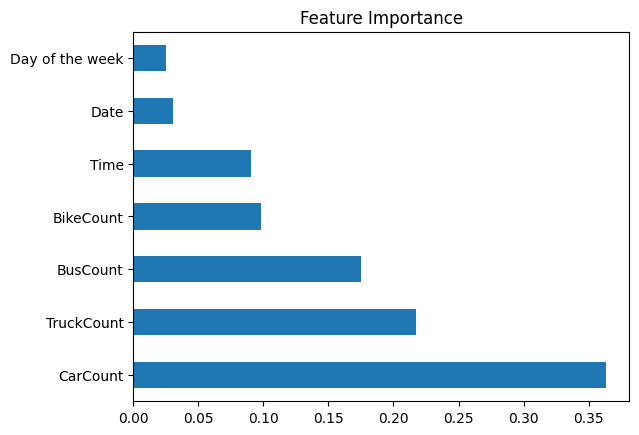

In [18]:
# Feature Importance to see the importance of the features in predicting the target variable
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importance')
plt.show()

**Conclusion :**
The Traffic Flow Prediction project provides critical insights into traffic patterns, highlighting peak congestion times and the impact of external factors such as weather or road conditions. By analyzing time-based traffic situations, the model identifies trends that can assist traffic authorities in managing congestion more effectively. The ability to predict traffic flow enables stakeholders to implement proactive measures, such as optimizing signal timings, adjusting public transport schedules, and planning road maintenance during low-traffic periods. These predictions can also support real-time traffic monitoring and alert systems, allowing for dynamic rerouting and minimizing disruptions during high-traffic periods.